In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

# Importing dataset
df = pd.read_csv("books.csv")
df.head()


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [37]:
# Handling missing values

num_cols = ["rating", "numRatings", "pages", "bbeScore", "price"]
cat_cols = ["author", "language", "bookFormat", "genres"]

print("Missing values before handling:")
print(df[num_cols + cat_cols].isnull().sum())

# Convert numerical columns to numeric 
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing numerical values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

print("\nMissing values after handling:")
print(df[num_cols + cat_cols].isnull().sum())


Missing values before handling:
rating        0
numRatings    0
pages         0
bbeScore      0
price         0
author        0
language      0
bookFormat    0
genres        0
dtype: int64

Missing values after handling:
rating        0
numRatings    0
pages         0
bbeScore      0
price         0
author        0
language      0
bookFormat    0
genres        0
dtype: int64


In [39]:

# Creating rating quality classes
def rating_quality(r):
    if r < 3:
        return "Low"
    elif r <= 4:
        return "Medium"
    else:
        return "High"

df["rating_class"] = df["rating"].apply(rating_quality)

print("Rating classes created.")
df["rating_class"].value_counts()




Rating classes created.


rating_class
High      27772
Medium    24456
Low         250
Name: count, dtype: int64

In [41]:
# Content-based feature engineering (Top 20 genres)

# Ensure genres column is string
df["genres"] = df["genres"].astype(str)

all_genres = df["genres"].str.split(",", expand=True).stack().str.strip()
top_genres = all_genres.value_counts().head(20).index.tolist()

print("Top 20 genres used as features:")
print(top_genres)

for genre in top_genres:
    df[f"genre_{genre}"] = df["genres"].str.contains(
        genre, regex=False, na=False
    ).astype(int)

print("Genre-based features created.")
df[[f"genre_{g}" for g in top_genres]].head()




Top 20 genres used as features:
["'Fiction'", "'Romance'", "'Contemporary'", "'Fantasy'", "'Young Adult'", "'Adult'", "'Novels'", "['Fiction'", "'Audiobook'", "'Historical'", "'Adventure'", "['Fantasy'", "'Classics'", "'Nonfiction'", "'Mystery'", "'Literature'", "'Historical Fiction'", "'Paranormal'", '[]', "'Childrens'"]
Genre-based features created.


,genre_'Fiction',genre_'Romance',genre_'Contemporary',genre_'Fantasy',genre_'Young Adult',genre_'Adult',genre_'Novels',genre_['Fiction',genre_'Audiobook',genre_'Historical',genre_'Adventure',genre_['Fantasy',genre_'Classics',genre_'Nonfiction',genre_'Mystery',genre_'Literature',genre_'Historical Fiction',genre_'Paranormal',genre_[],genre_'Childrens'
0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
3,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0
4,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
# Encoding categorical features
df["author_code"] = LabelEncoder().fit_transform(df["author"])
df["format_code"] = LabelEncoder().fit_transform(df["bookFormat"])
df["language_code"] = LabelEncoder().fit_transform(df["language"])

print("Categorical features encoded.")
df[["author_code", "format_code", "language_code"]].head()




Categorical features encoded.


,author_code,format_code,language_code
0,24935,43,23
1,10837,74,23
2,9708,74,23
3,11534,74,23
4,24552,74,23


In [45]:
# Feature matrix
feature_cols = (
    [f"genre_{g}" for g in top_genres] +
    ["author_code", "format_code", "language_code",
     "rating", "numRatings", "pages", "bbeScore", "price"]
)

X = df[feature_cols]
y = df["rating_class"]

print("Feature matrix and target variable created.")
print("Feature matrix shape:", X.shape)


Feature matrix and target variable created.
Feature matrix shape: (52478, 28)


In [47]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Feature scaling completed.")
X_scaled.head()



Feature scaling completed.


,genre_'Fiction',genre_'Romance',genre_'Contemporary',genre_'Fantasy',genre_'Young Adult',genre_'Adult',genre_'Novels',genre_['Fiction',genre_'Audiobook',genre_'Historical',...,genre_[],genre_'Childrens',author_code,format_code,language_code,rating,numRatings,pages,bbeScore,price
0,0.811604,1.544917,-0.500726,1.577288,1.849712,-0.431771,-0.417988,-0.364045,-0.402198,-0.372122,...,-0.310812,-0.332564,1.353882,-1.189616,-0.352159,0.839243,61.176348,0.188458,85.109328,-0.160886
1,0.811604,-0.647284,-0.500726,1.577288,1.849712,-0.431771,-0.417988,-0.364045,2.486339,-0.372122,...,-0.310812,3.006944,-0.397709,0.422398,-0.352159,1.302278,23.952796,2.200882,74.823293,-0.050780
2,0.811604,-0.647284,-0.500726,-0.634000,1.849712,-0.431771,2.392413,-0.364045,-0.402198,2.687290,...,-0.310812,-0.332564,-0.537980,0.422398,-0.352159,0.703056,43.130969,-0.014407,64.501757,-0.155597
3,0.811604,1.544917,-0.500726,-0.634000,-0.540625,2.316043,2.392413,-0.364045,-0.402198,2.687290,...,-0.310812,-0.332564,-0.311111,0.422398,-0.352159,0.648581,28.672828,-0.196986,56.357714,-0.155597
4,0.811604,1.544917,-0.500726,1.577288,1.849712,-0.431771,-0.417988,-0.364045,-0.402198,-0.372122,...,-0.310812,-0.332564,1.306296,0.422398,-0.352159,-1.149084,47.589572,0.703736,41.460811,-0.304650


In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-test split completed.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Train-test split completed.
Training set size: (41982, 28)
Testing set size: (10496, 28)


In [51]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [53]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [55]:
# KNN for recommendation
knn = NearestNeighbors(n_neighbors=10, metric="cosine")
knn.fit(X_scaled)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [57]:
# Book index mapping
title_to_index = pd.Series(df.index, index=df["title"]).to_dict()

print("Book title to index mapping created.")
print("Sample titles:", list(title_to_index.keys())[:5])


Book title to index mapping created.
Sample titles: ['The Hunger Games', 'Harry Potter and the Order of the Phoenix', 'To Kill a Mockingbird', 'Pride and Prejudice', 'Twilight']


In [59]:
# User taste vector from liked books
def build_user_profile(book_titles):
    indices = [title_to_index[t] for t in book_titles if t in title_to_index]
    user_vector = X_scaled.iloc[indices].mean(axis=0)
    return user_vector.values.reshape(1, -1)


# Recommendation using user profile + quality filtering
def recommend_from_taste(book_titles, top_n=5, min_quality="Medium"):
    user_profile = build_user_profile(book_titles)
    distances, indices = knn.kneighbors(user_profile, n_neighbors=top_n * 5)

    quality_rank = {"Low": 0, "Medium": 1, "High": 2}
    min_q = quality_rank[min_quality]

    seed_indices = {title_to_index[t] for t in book_titles}
    recommendations = []

    for d, i in zip(distances[0], indices[0]):
        if i in seed_indices:
            continue

        predicted_quality = rf.predict(X_scaled.iloc[[i]])[0]
        if quality_rank[predicted_quality] >= min_q:
            recommendations.append((df.iloc[i]["title"], 1 - d))

        if len(recommendations) == top_n:
            break

    return recommendations




# Simple user input interface
print("Pick 3 books you liked:")

liked_books = []
while len(liked_books) < 3:
    name = input(f"Book {len(liked_books)+1}: ").strip()
    if name in title_to_index:
        liked_books.append(name)
    else:
        print("Book not found. Try again.")

results = recommend_from_taste(liked_books)

print("\nRecommended Books:")
for title, score in results:
    print(f"{title} - Similarity Score: {score:.3f}")



Pick 3 books you liked:


Book 1:  To Kill a Mockingbird
Book 2:  Harry Potter and the Order of the Phoenix
Book 3:  The Hunger Games



Recommended Books:
Pride and Prejudice - Similarity Score: 0.994
Animal Farm - Similarity Score: 0.988
The Book Thief - Similarity Score: 0.988
The Hitchhiker's Guide to the Galaxy - Similarity Score: 0.984
The Perks of Being a Wallflower - Similarity Score: 0.984


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


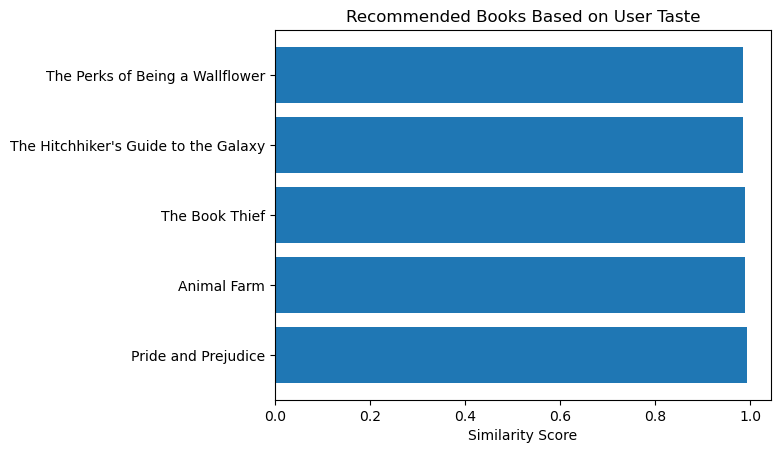

In [61]:
# Visualization
titles = [r[0] for r in results]
scores = [r[1] for r in results]

plt.barh(titles, scores)
plt.xlabel("Similarity Score")
plt.title("Recommended Books Based on User Taste")
plt.show()


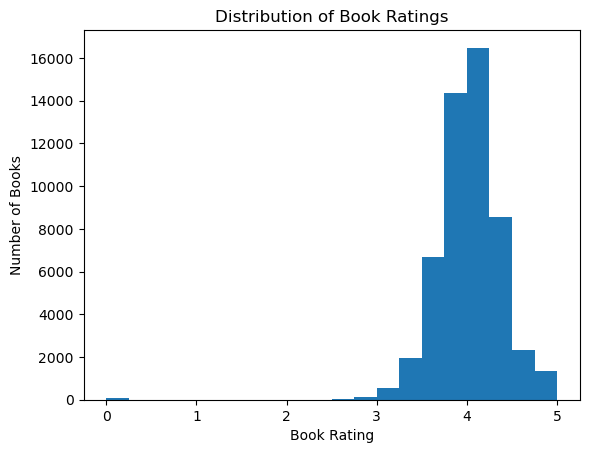

Displayed rating distribution histogram.


In [63]:
# Plot 1: Rating Distribution

plt.figure()
plt.hist(df["rating"], bins=20)
plt.xlabel("Book Rating")
plt.ylabel("Number of Books")
plt.title("Distribution of Book Ratings")
plt.show()

print("Displayed rating distribution histogram.")


In [ ]:
# Plot 2: Number of Ratings vs Rating

plt.figure()
plt.scatter(df["rating"], df["numRatings"], alpha=0.5)
plt.xlabel("Average Rating")
plt.ylabel("Number of Ratings")
plt.title("Rating vs Number of Ratings")
plt.show()

print("Displayed rating vs number of ratings scatter plot.")

# Plot 3: Feature Importance from Random Forest

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_scaled.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure()
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

print("Displayed Random Forest feature importance.")
feature_importance_df


# Plot 4: Rating Class Distribution

rating_counts = df["rating_class"].value_counts()

plt.figure()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating Class")
plt.ylabel("Number of Books")
plt.title("Distribution of Rating Classes")
plt.show()

print("Displayed rating class distribution.")
rating_counts